## Extract bubble from simulations

In [30]:
from bubble_tools_vac import *
from experiment_vac import *

In [34]:
minSim = 0
maxSim = 2000

tmp      = 1
ph0      = phi0List[tmp]
lamb     = lambList[tmp]
sigmafld = fluct_stdev(lamb, ph0, temp)

### Useful
right_Vmax  = sco.minimize_scalar(V, args=lamb, bounds=(np.pi, 2*np.pi), method='bounded')
left_Vmax   = sco.minimize_scalar(V, args=lamb, bounds=(0    ,   np.pi), method='bounded')
amp_thresh    = right_Vmax.x
crit_thresh   = right_Vmax.x
tv_thresh     = right_Vmax.x
crit_rad      = 80

print('Looking at at lambda, T, phi0, m2, sigma:', lamb, temp, ph0, m2(lamb), sigmafld)


Looking at at lambda, T, phi0, m2, sigma: 1.5 0.0 2.243994752564138 0.01 0.3720269612935138


In [35]:
classify = False # quickly get an indea of decay rates
checks = False # verify visually that triage classified sims correctly
decays = False # plot histogram of true vacuum choice
get_decayrate = False
get_energy = False
get_ps = False

pspec_path = './data/powspec_lamb'+str('%.4f'%lamb)+'_phi0'+str('%.4f'%ph0)
en_path = './data/energy_lamb'+str('%.4f'%lamb)+'_phi0'+str('%.4f'%ph0)

path_sims_notdecayed = path_nodecay_sims(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)
path_sims_decayed    = path_decayed_sims(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)

if os.path.exists(path_sims_decayed+'.npy'):
    sims_notdecayed = np.asarray(np.load(path_sims_notdecayed + '.npy'))
    sims_decayed    = np.asarray(np.load(path_sims_decayed    + '.npy'))
    
   # print(np.asarray(sims_notdecayed))
   # print(np.asarray(sims_decayed))
    print(len(sims_notdecayed[:,0]))
    print(len(sims_decayed[:,0]))
#else:
#    classify = True


1547
453


In [36]:
if classify:
    sims_notdecayed, sims_decayed = [], []
    for sim in range(minSim, maxSim):
        path_sim = sim_location(nLat, lamb, ph0, temp, sim)
        if os.path.exists(path_sim):
            outcome = triage(nLat, nTimeMAX, phieq, sigmafld, path_sim)
            print(sim, outcome)

            if outcome != 2: sims_decayed.append(np.asarray([sim, outcome]))
            else: sims_notdecayed.append(np.asarray([sim, outcome]))

    np.save(path_nodecay_sims(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX), np.asarray(sims_notdecayed))
    np.save(path_decayed_sims(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX), np.asarray(sims_decayed))


In [37]:
if checks:
    for sim, outcome in sims_decayed:
        path_clean_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)
        if not os.path.exists(path_clean_sim+'.npy'):
            path_sim = sim_location(nLat, lamb, ph0, temp, sim)
            real, _ = get_realisation(nLat, sim, path_sim, outcome, phieq)

            real = remove_collisions(real, phieq, crit_rad)
            real, tdecay = centre_bubble(real, nLat, phieq, crit_thresh, crit_rad)

            np.save(path_clean_sim, [real, sim, tdecay, outcome])

        #    print(len(real[0]))
        #    data2plot = real[0,-int(nLat):]
        #    nT,nN = np.shape(data2plot)
        #    simple_imshow(data2plot, [0,nN,0,nT], 'Simulation '+str(sim))


0
1.4 2.243994752564138 0.0076799999999999985 0.0 0.37747299665096823 16384
1
1.5 2.243994752564138 0.01 0.0 0.3720269612935138 16384


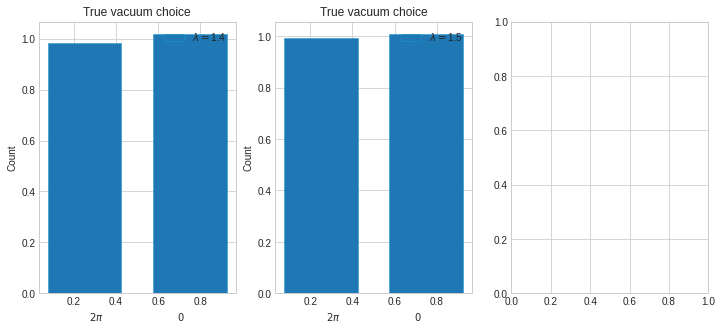

In [80]:
# Classify decays
if True:
    fig, ax = plt.subplots(1,3, figsize = (12,5))
    plt.style.use('seaborn-whitegrid') # nice and clean grid
    for tmp in range(len(phi0List)):
        print(tmp)
        ph0      = phi0List[tmp]
        lamb     = lambList[tmp]
        sigmafld = fluct_stdev(lamb, ph0, temp)
        print(lamb, ph0, m2(lamb), temp, sigmafld, nTimeMAX)
        
        minSim=0
        if tmp==0:
            maxSim=3000
        elif tmp==1:
            maxSim=2000
            
        path_sims_notdecayed = path_nodecay_sims(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)
        path_sims_decayed    = path_decayed_sims(nLat, lamb, ph0, temp, minSim, maxSim, nTimeMAX)

        if os.path.exists(path_sims_decayed+'.npy'):
            sims_notdecayed = np.asarray(np.load(path_sims_notdecayed + '.npy'))
            sims_decayed    = np.asarray(np.load(path_sims_decayed    + '.npy'))
        else:
            continue

        outcomes = np.asarray(sims_decayed)[:,1]    
        
        if False:
            outcomes_spare = []
            for sim, outcome in sims_decayed:
                path_clean_sim = clean_sim_location(nLat, lamb, ph0, temp, sim)
                if os.path.exists(path_clean_sim+'.npy'):
                    real, sim, tdecay, outcome = np.asarray(np.load(path_clean_sim + '.npy'))
                    if tdecay > 1024: outcomes_spare.append(outcome)
            outcomes_spare = np.asarray(outcomes_spare)

        ax[tmp].hist(outcomes, density=True, bins=2, rwidth=0.7, edgecolor='#169acf', linewidth=0.5, label=r'$\lambda=$'+str(lamb))
#        ax[tmp].hist(outcomes_spare, density=True, bins=2, rwidth=0.7, edgecolor='#169acf', linewidth=0.5, label=r'$\lambda=$'+str(lamb))
        ax[tmp].set_title('True vacuum choice')
        ax[tmp].set_xlabel(r'$2\pi \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; 0$')
        ax[tmp].set_ylabel('Count')
        ax[tmp].legend()
    plt.savefig('./data/vacuum_choice.pdf'); plt.show()


In [81]:
def decay_fit(t, t0, gamma):
    return - gamma * (t - t0)

def survive_prob(t_decay, num_samp):
    frac_remain = float(num_samp - t_decay.size)/float(num_samp)
    prob = 1. - np.linspace(1./num_samp, 1. - frac_remain, t_decay.size, endpoint=True)
    return prob

def lin_fit_times(times,tmin,tmax,o=1):
    """
    Given a collection of decay times, do a linear fit to
    the logarithmic survival probability between given times
    Input
      times : Times object (first index is array of decay times, 2nd is original number of samples
      tmin  : minimum time to fit inside
      tmax  : maximum time to fit inside
    """
    t = np.sort(times[0])
    p = np.log( survive_prob(times[0], times[1]))
    ii = np.where( (t>tmin) & (t<tmax) )
    return ii, np.polyfit(t[ii],p[ii],o)

0
1.4 2.243994752564138 0.0076799999999999985 0.0 0.37747299665096823 16384
1262
fit params: [-0.00021901 -0.01052295] , # bubbles: 1262
1
1.5 2.243994752564138 0.01 0.0 0.3720269612935138 16384
227
fit params: [-0.00014858  0.11474825] , # bubbles: 227


/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
/cm/shared/apps/conda-environments/python37/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log


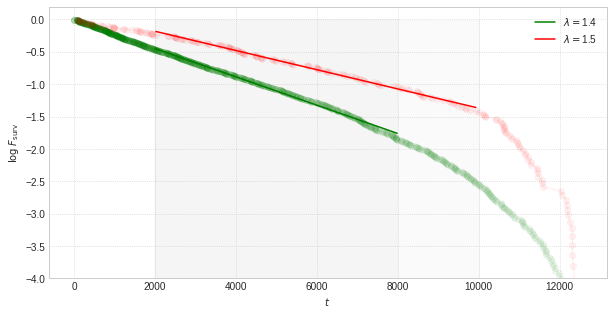

In [90]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
plt.style.use('seaborn-whitegrid') # nice and clean grid
cols=['g', 'r', 'b']
for tmp in range(len(phi0List)):
    print(tmp)
    ph0      = phi0List[tmp]
    lamb     = lambList[tmp]
    sigmafld = fluct_stdev(lamb, ph0, temp)
    print(lamb, ph0, m2(lamb), temp, sigmafld, nTimeMAX)

    path_decaytimes = './data/tdecaylists_lamb'+str('%.4f'%lamb)+'_phi0'+str('%.4f'%ph0)+'_temp'+str('%.4f'%temp)
    if os.path.exists(path_decaytimes+'.npy'):
        decaydata = np.load(path_decaytimes+'.npy')
        decaydata = decaydata[::2,1]*dtout
        print(len(decaydata))
        tdecays = [np.sort(np.asarray(decaydata)), len(decaydata)]  

        if tmp == 0:
            tmin = 2000#min(tdecays[0])
            tmax = 8000#max(tdecays[0])
        elif tmp == 1:
            tmin = 2000#min(tdecays[0])
            tmax = 10000#max(tdecays[0])
        tinds, jfit_times = lin_fit_times(tdecays, tmin, tmax)

        print('fit params:', jfit_times, ', # bubbles:', len(tdecays[0]))

        ax.plot(tdecays[0][tinds], (tdecays[0][tinds]*jfit_times[0]+jfit_times[1]), color=cols[tmp], ls='-', label=r'$\lambda=$'+str(lamb))
        ax.plot(tdecays[0][:-2], np.log(survive_prob(tdecays[0][:-2], tdecays[1])), color=cols[tmp], marker='o', ms=6, alpha=0.05)
    #    ax.plot(tdecays[0][tinds], np.exp(tdecays[0][tinds]*jfit_times[0]+jfit_times[1]), color=cols[tmp], ls='-', label=r'$\lambda=$'+str(lamb))
    #    ax.plot(tdecays[0], survive_prob(tdecays[0], tdecays[1]), color=cols[tmp], marker='o', alpha=0.01)
        ax.set_xlabel(r'$t$')
        plt.fill_betweenx(np.log(survive_prob(tdecays[0], tdecays[1])), np.ones(tdecays[1])*(tmin), np.ones(tdecays[1])*(tmax), color='darkgray', alpha=0.05)
        ax.set_ylabel(r'$\log \; F_{\rm surv}$')
        ax.set_ylim((-4, 0.2))
        ax.legend()
plt.grid(True, ls=':', color='lightgray')
plt.savefig('./data/vacuum_decayrates.pdf')
plt.show()

In [73]:
tlist = [0]+np.linspace(1, nTimeMAX-1, 30).tolist()
tlist = np.asarray(tlist, dtype = 'int')
print(tlist)

if False:
    tmp = 0
    ph0 = phi0List[tmp]
    lamb = lambList[tmp]
    minSim = 500
    maxSim = 3000
    div = 25
    simList = np.arange(minSim, maxSim+1 , div)

    divdata = np.asarray([(ii,jj) for ii,jj in zip(simList[:-1], simList[1:])])
    pspec_path = './data/powspec_lamb'+str('%.4f'%lamb)+'_phi0'+str('%.4f'%ph0)#+'_temp'+str('%.4f'%temp)
    en_path = './data/energy_lamb'+str('%.4f'%lamb)+'_phi0'+str('%.4f'%ph0)#+'_temp'+str('%.4f'%temp)

    allPS = np.empty(0)
    for (sima, simb) in divdata:
        pathPS = pspec_path+'_minsim'+str(sima)+'_maxSim'+str(simb)+'.npy'
        partPS = np.load(pathPS)
        #allPS.append(pathPS)
        allPS = np.concatenate((allPS,partPS))
#    print(np.shape(np.asarray(allPS).flatten()))
    np.save(pspec_path+'_temp'+str('%.4f'%temp), allPS)

    allEN = np.empty(0)
    for (sima, simb) in divdata:
        pathEN = en_path+'_minsim'+str(sima)+'_maxSim'+str(simb)+'.npy'
        partEN = np.load(pathEN)
        #allEN.append(pathEN)
        allEN = np.concatenate((allEN,partEN))
#    print(np.shape(allEN))
    np.save(en_path+'_temp'+str('%.4f'%temp), allEN)

[    0     1   565  1130  1695  2260  2825  3390  3955  4520  5085  5649
  6214  6779  7344  7909  8474  9039  9604 10169 10734 11298 11863 12428
 12993 13558 14123 14688 15253 15818 16383]


0
1.4 2.243994752564138 0.0076799999999999985 0.0 0.37747299665096823 16384
(2500,)
(31, 2500, 2048)
10
20
27
28
29
29
1
1.5 2.243994752564138 0.01 0.0 0.3720269612935138 16384
(2000,)
(31, 2000, 2048)
27
28
29
29


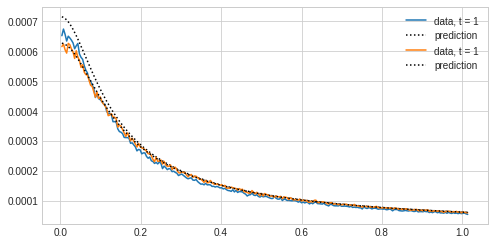

In [74]:
fig, ax = plt.subplots(1,1, figsize = (8,4))
plt.style.use('seaborn-whitegrid') # nice and clean grid
for tmp in range(len(phi0List)):
    print(tmp)
    ph0      = phi0List[tmp]
    lamb     = lambList[tmp]
    sigmafld = fluct_stdev(lamb, ph0, temp)
    print(lamb, ph0, m2(lamb), temp, sigmafld, nTimeMAX)

    pspec_path = './data/powspec_lamb'+str('%.4f'%lamb)+'_phi0'+str('%.4f'%ph0)+'_temp'+str('%.4f'%temp)
    en_path = './data/energy_lamb'+str('%.4f'%lamb)+'_phi0'+str('%.4f'%ph0)+'_temp'+str('%.4f'%temp)
    if os.path.exists(pspec_path+'.npy'):
        fftdata = np.load(pspec_path+'.npy')
        print(np.shape(fftdata))

        simavfftdata = np.empty((len(tlist), len(fftdata), nLat)); print(np.shape(simavfftdata))
        tMax = 0
        for sind in range(len(fftdata)):
            for tind, tt in enumerate(tlist):
                try:
                    simavfftdata[tind,sind,:] = fftdata[sind][tind]
                except:
                    if tind-1 > tMax:
                        tMax = tind-1
                        print(tMax)
                    break
        print(tMax)
        simavfftdata = np.mean(simavfftdata, axis=1)

        aa = 1
        bb = knyq//4
        allps = np.nanmean(simavfftdata, axis=0)[aa:bb]
        klist2plot = klist[aa:bb]

        psth = pspec(lamb, ph0, temp)[aa:bb]

        for tind, tt in enumerate(tlist):
            if tind==1 and tind<=tMax:
                plt.plot(klist2plot, simavfftdata[tind][aa:bb], label='data, t = '+str(tt), ls='-')

      #  plt.plot(klist2plot, allps, label='average', ls=':')
        plt.plot(klist2plot, psth, ls=':', color='k', label='prediction')
#plt.yscale('log')
plt.legend()
plt.savefig('./data/powspec_evolution_lamb'+str('%.4f'%lamb)+'_phi0'+str('%.4f'%ph0)+'.pdf')
plt.show()

Sims in total: 2000
(31, 2000, 2048)
29
1.5 2.243994752564138 0.0


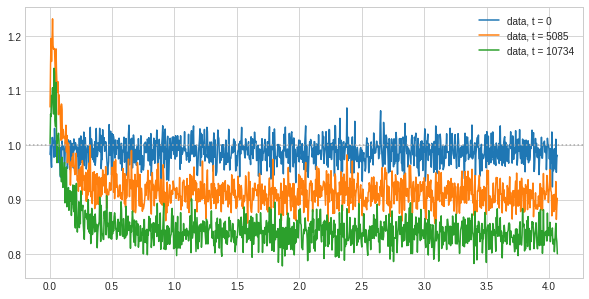

In [75]:
if os.path.exists(pspec_path+'.npy'):
    fftdata = np.load(pspec_path+'.npy')
    print('Sims in total:', len(fftdata))

    simavfftdata = np.empty((len(tlist), len(fftdata), nLat)); print(np.shape(simavfftdata))
    tMax = 0
    for sind in range(len(fftdata)):
        for tind, tt in enumerate(tlist):
            try:
                simavfftdata[tind,sind,:] = fftdata[sind][tind]
            except:
                if tind-1 > tMax:
                    tMax = tind-1
                break
    simavfftdata = np.mean(simavfftdata, axis=1)
    print(tMax)

    aa = 1
    bb = knyq-1
    allps = np.nanmean(simavfftdata, axis=0)[aa:bb]
    klist2plot = klist[aa:bb]

    print(lamb, ph0, temp)
    psth = pspec(lamb, ph0, temp)[aa:bb]#*w2(lamb)[aa:bb]

    fig, ax = plt.subplots(1,1, figsize = (10,5))
    for tind, tt in enumerate(tlist):
        if tind%10==0 and tind<=tMax:
            plt.plot(klist2plot, simavfftdata[tind][aa:bb]/psth, label='data, t = '+str(tt), ls='-')

 #   plt.plot(klist2plot, allps/psth, label='average', ls='-')
    plt.axhline(1., ls=':', color='darkgray')
    plt.legend()
  #  plt.ylim((0,2))
  #  plt.yscale('log')
    plt.savefig('./data/powspec_evolution_lamb'+str('%.4f'%lamb)+'_phi0'+str('%.4f'%ph0)+'.pdf')
    plt.show()

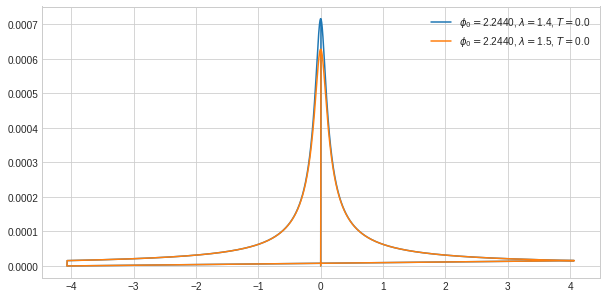

In [76]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
for tmp, ph0 in enumerate(phi0List):
    lamb = lambList[tmp]

    plt.plot(klist, pspec(lamb, ph0, temp), ls='-', label=r'$\phi_0=$'+str('%.4f'%ph0)+r', $\lambda=$'+str(lamb)+r', $T=$'+str(temp)) # th pow spec
plt.legend()
plt.show()

Sims in total: 2000
sim 0 initial energy 0.2807765329141186 final energy 0.2807729322470729 std 2.2891875495795725e-05


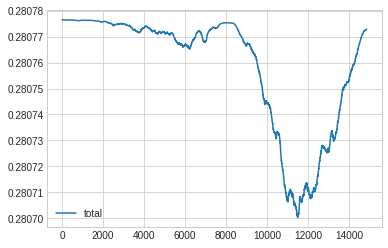

sim 500 initial energy 0.27444176162948 final energy 0.27441926020400115 std 1.2402042365201112e-05


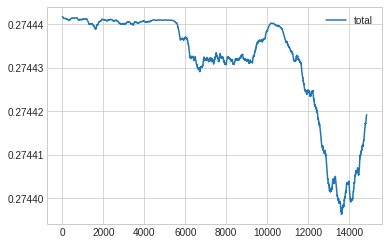

sim 1000 initial energy 0.2816115240650844 final energy 0.28159840101286715 std 1.4045929583421445e-05


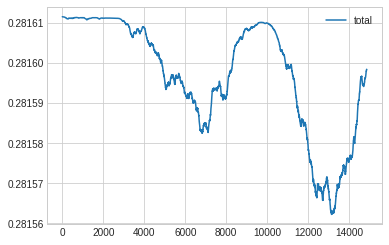

sim 1500 initial energy 0.27805483049159097 final energy 0.2780478414983615 std 9.381264388848751e-06


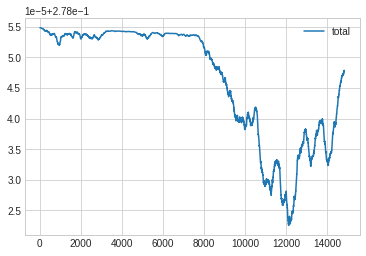

In [77]:
if True:
    if os.path.exists(en_path+'.npy'):
        energy_data = np.load(en_path+'.npy')
        print('Sims in total:', len(energy_data))

        for sim, energy in enumerate(energy_data):
            if sim%500==0:
                try:
                    print('sim', sim, 'initial energy', energy[0], 'final energy', energy[-1], 'std', np.std(energy))

                    plt.plot(energy, label='total')
                    plt.legend(); plt.show()
                except:
                    continue